
# Exploratory Data Analysis (EDA)  of   PEA24- Estimated Immigration  by  Citizenship (Persons in April)


Notebook provides an exploratory data analysis (EDA) of the PEA24  The complete series of datasets can be found at
[Central Statistics Office in Ireland  population of Ireland,](https://data.cso.ie/product/pme)

| Code   | Description               | Status |
| ------ | ------------------------- | ------ |
| PEA01  | Population Estimates      | EDAed       |
| PEA03  | Flow                      |        |
| PEA04  | Region                    |        |
| PEA11  | Single                    |        |
| PEA15  | Component                 | EDAed       |
| PEA18  | Origin/Destination        |        |
| PEA23  | Citizenship Emigration    |   EDAed      |
| PEA24  | Citizenship Immigration   |   EDAed      |
| PEA25  | Citizenship Population    |    EDAed     |

Click on the image to explore reconfigure the data at source.

<a href="https://data.cso.ie/table/PEA24">
    <img src="../screens/pea24.png" alt="Example Image" width="500"/>
</a>





## Loading  Libraries and Functions



In [1]:
import pandas as pd
import altair as alt
# Enable the VegaFusion data transformer
alt.data_transformers.enable('vegafusion')
import matplotlib.pyplot as plt
# Adjusting default font sizes for all plots
plt.rcParams['axes.titlesize'] = 16   # For title
plt.rcParams['axes.labelsize'] = 16   # For x and y labels
plt.rcParams['xtick.labelsize'] = 12  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # For y-axis tick labels
import seaborn as sns
import os
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

%matplotlib inline


## Loading  PEA24 Immigration by Citizenship raw

In [2]:
# Load the dataset
file_path = '../raw/PEA24.csv'
df = pd.read_csv(file_path)

In [3]:
# Preview top 5 rows
df.head() # Note examples of missing population change data in top few rows

,Statistic Label,Year,Sex,Citizenship,UNIT,VALUE
0,Estimated Immigration (Persons in April),1996,Both sexes,All Countries,Thousand,39.2
1,Estimated Immigration (Persons in April),1996,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,Thousand,5.0
2,Estimated Immigration (Persons in April),1996,Both sexes,EU15 to EU27 (accession countries joined post ...,Thousand,NaN
3,Estimated Immigration (Persons in April),1996,Both sexes,United Kingdom,Thousand,8.3
4,Estimated Immigration (Persons in April),1996,Both sexes,Ireland,Thousand,17.7


In [4]:
#  Unique Values
df.nunique()

Statistic Label      1
Year                28
Sex                  3
Citizenship          6
UNIT                 1
VALUE              258
dtype: int64

In [5]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'Statistic Label': array(['Estimated Immigration (Persons in April)'], dtype=object),
 'Sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'Citizenship': array(['All Countries',
        'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)',
        'EU15 to EU27 (accession countries joined post 2004)',
        'United Kingdom', 'Ireland',
        'All countries excluding Ireland,United Kingdom and EU272020'],
       dtype=object),
 'UNIT': array(['Thousand'], dtype=object)}

 ## Duplication check PEA24 Immigration by Citizenship
 There are no duplicated rows in dataframe df_long.

In [6]:
# duplicates = df.duplicated()
# any_duplicates = duplicates.any()
# # Print result based on the condition
# if any_duplicates:
#     print("There are duplicated rows in dataframe df_long.")
# else:
#     print("There are no duplicated rows in dataframe df_long.")

In [7]:
df.columns

Index(['Statistic Label', 'Year', 'Sex', 'Citizenship', 'UNIT', 'VALUE'], dtype='object')

## Long Dataframe PEA24 Immigration by Citizenship housekeeping 

In [8]:
# Check if the columns 'STATISTIC Label' and 'UNIT' exist in the DataFrame
columns_to_drop = [col for col in ['Statistic Label', 'UNIT'] if col in df.columns]

# Drop the columns if they exist
if columns_to_drop:
    df = df.drop(columns_to_drop, axis=1)


# Renaming the remaining columns according to pythonic conventions
df = df.rename(columns={
    'Year': 'year',
    'Sex': 'sex',
    'Citizenship':'citizenship',
    'Origin or Destination': 'endpoint',
    'VALUE': 'value'
})
#preview changes
df


,year,sex,citizenship,value
0,1996,Both sexes,All Countries,39.2
1,1996,Both sexes,EU14 excl Irl (countries in the EU pre 2004 ex...,5.0
2,1996,Both sexes,EU15 to EU27 (accession countries joined post ...,NaN
3,1996,Both sexes,United Kingdom,8.3
4,1996,Both sexes,Ireland,17.7
...,...,...,...,...
499,2023,Female,EU14 excl Irl (countries in the EU pre 2004 ex...,7.7
500,2023,Female,EU15 to EU27 (accession countries joined post ...,5.8
501,2023,Female,United Kingdom,2.5
502,2023,Female,Ireland,14.3


In [9]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'citizenship': array(['All Countries',
        'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)',
        'EU15 to EU27 (accession countries joined post 2004)',
        'United Kingdom', 'Ireland',
        'All countries excluding Ireland,United Kingdom and EU272020'],
       dtype=object)}

In [10]:

# Save the clean DataFrame to a new CSV file
df.to_csv('../data/long_PEA24 Immigration by Citizenship.csv', index=True)

In [11]:
df.columns

Index(['year', 'sex', 'citizenship', 'value'], dtype='object')

## Pivot data

In [12]:
# Pivoting the data with 'country' as columns and 'year', 'sex', 'endpoint' as index
df_pivot = df.pivot_table(index=['year', 'sex'], columns='citizenship', values='value', aggfunc='first')
#Reset index
df_pivot.reset_index(inplace=True)
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/country-pivot.csv', index=True)
# Resetting the index to use 'year' in the plot
df_pivot = df_pivot.reset_index()
# Displaying the first few rows of the pivoted data
df_pivot.columns

Index(['index', 'year', 'sex', 'All Countries',
       'All countries excluding Ireland,United Kingdom and EU272020',
       'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)',
       'EU15 to EU27 (accession countries joined post 2004)', 'Ireland',
       'United Kingdom'],
      dtype='object', name='citizenship')

In [13]:
df_pivot.columns

Index(['index', 'year', 'sex', 'All Countries',
       'All countries excluding Ireland,United Kingdom and EU272020',
       'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)',
       'EU15 to EU27 (accession countries joined post 2004)', 'Ireland',
       'United Kingdom'],
      dtype='object', name='citizenship')

In [14]:
df_pivot.head()

citizenship,index,year,sex,All Countries,"All countries excluding Ireland,United Kingdom and EU272020",EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland),EU15 to EU27 (accession countries joined post 2004),Ireland,United Kingdom
0,0,1996,Both sexes,39.2,8.2,5.0,NaN,17.7,8.3
1,1,1996,Female,20.4,4.2,2.8,NaN,9.5,3.9
2,2,1996,Male,18.8,4.0,2.2,NaN,8.2,4.3
3,3,1997,Both sexes,44.5,9.7,5.5,NaN,20.8,8.4
4,4,1997,Female,22.6,5.1,3.1,NaN,10.7,3.8


In [15]:
# Dictionary for renaming columns
rename_dict = {
    'All countries excluding Ireland,United Kingdom and EU272020': 'Non-EU/Ireland/UK 2020',
    'EU14 excl Irl (countries in the EU pre 2004 excluding UK & Ireland)': 'EU14 excl Irl',
    'EU15 to EU27 (accession countries joined post 2004)': 'EU15 to EU27',
    'Ireland': 'Ireland',
    'United Kingdom': 'United Kingdom'
}
df_pivot.rename(columns=rename_dict, inplace=True)
df_pivot.head()



citizenship,index,year,sex,All Countries,Non-EU/Ireland/UK 2020,EU14 excl Irl,EU15 to EU27,Ireland,United Kingdom
0,0,1996,Both sexes,39.2,8.2,5.0,NaN,17.7,8.3
1,1,1996,Female,20.4,4.2,2.8,NaN,9.5,3.9
2,2,1996,Male,18.8,4.0,2.2,NaN,8.2,4.3
3,3,1997,Both sexes,44.5,9.7,5.5,NaN,20.8,8.4
4,4,1997,Female,22.6,5.1,3.1,NaN,10.7,3.8


 ## Cleaning PEA24 Immigration by Citizenship 

In [16]:
# NaNs mask summed per column.
df_pivot.isna().sum()

citizenship
index                      0
year                       0
sex                        0
All Countries              0
Non-EU/Ireland/UK 2020     0
EU14 excl Irl              0
EU15 to EU27              27
Ireland                    0
United Kingdom             0
dtype: int64

 ## Visualising missing  PEA24 Immigration by Citizenship

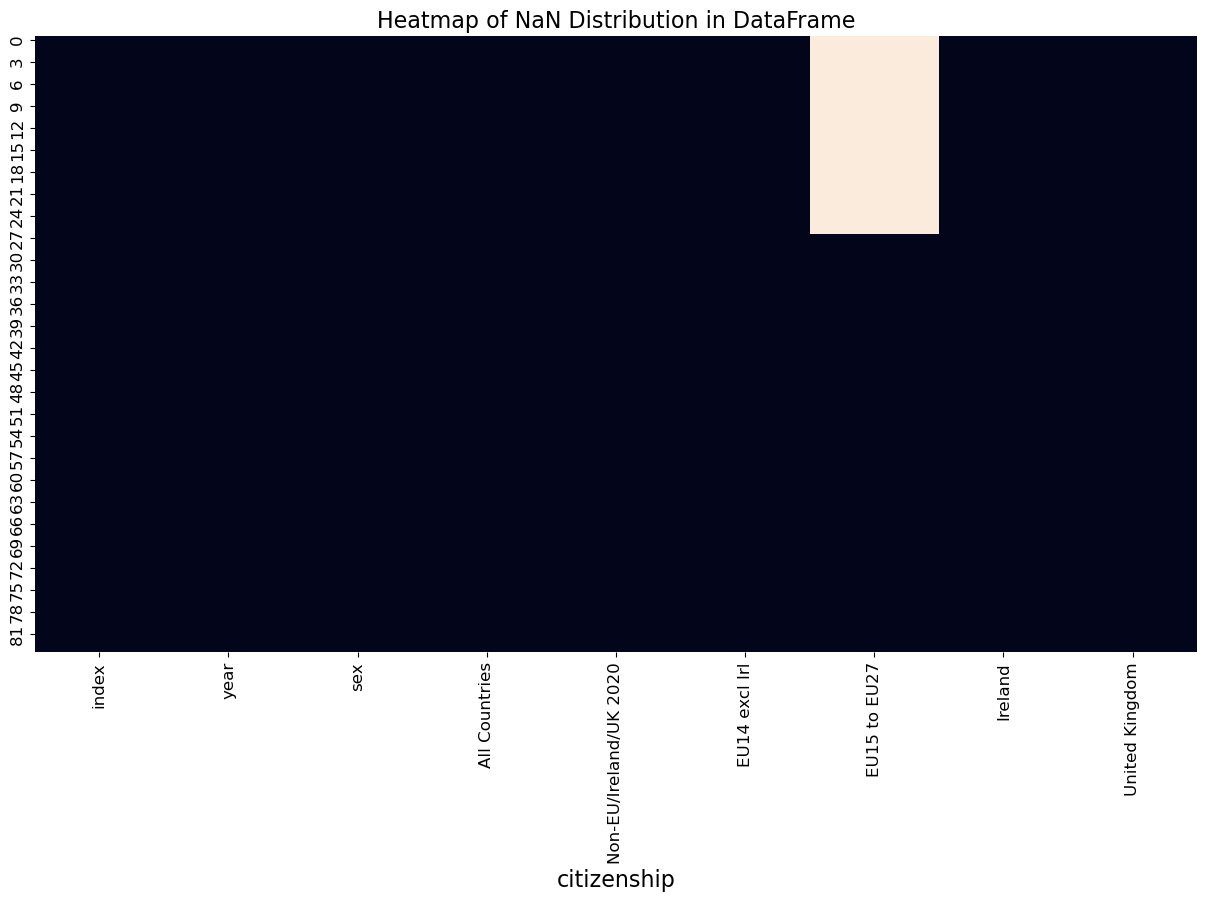

In [17]:
# Plotting a heatmap to show the distribution of NaN values
plt.figure(figsize=(15, 8))
sns.heatmap(df_pivot.isna(), cbar=False)
plt.title("Heatmap of NaN Distribution in DataFrame")
plt.savefig('../images/citizenship_immigration_missing_heatmap.png')
plt.show()


## Cleaning strategy:

Replace the NaN values in  'EU15 to EU27'  with zeros (0) using  .fillna() method in Pandas. 

EU15: The  original 15 EU member states before the 2004 enlargement.

Ten new members: Cyprus, Czech Republic, Estonia, Hungary, Latvia, Lithuania, Malta, Poland, Slovakia, and Slovenia. Later, Bulgaria and Romania joined in 2007, and Croatia in 2013, forming the EU27 (pre-Brexit).

Data Context: NaNs for earlier years can be assumed to be zero.



In [18]:
# Replace NaN values in 'EU15 to EU27' column with 0
df_pivot['EU15 to EU27'] = df_pivot['EU15 to EU27'].fillna(0)

# Check the changes
df_pivot.isna().sum()


citizenship
index                     0
year                      0
sex                       0
All Countries             0
Non-EU/Ireland/UK 2020    0
EU14 excl Irl             0
EU15 to EU27              0
Ireland                   0
United Kingdom            0
dtype: int64

In [19]:
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/pivot_citizenship_immigration.csv', index=True)

## Initial EDA on PEA24 Immigration by Citizenship

In [20]:
df_pivot.head()

citizenship,index,year,sex,All Countries,Non-EU/Ireland/UK 2020,EU14 excl Irl,EU15 to EU27,Ireland,United Kingdom
0,0,1996,Both sexes,39.2,8.2,5.0,0.0,17.7,8.3
1,1,1996,Female,20.4,4.2,2.8,0.0,9.5,3.9
2,2,1996,Male,18.8,4.0,2.2,0.0,8.2,4.3
3,3,1997,Both sexes,44.5,9.7,5.5,0.0,20.8,8.4
4,4,1997,Female,22.6,5.1,3.1,0.0,10.7,3.8


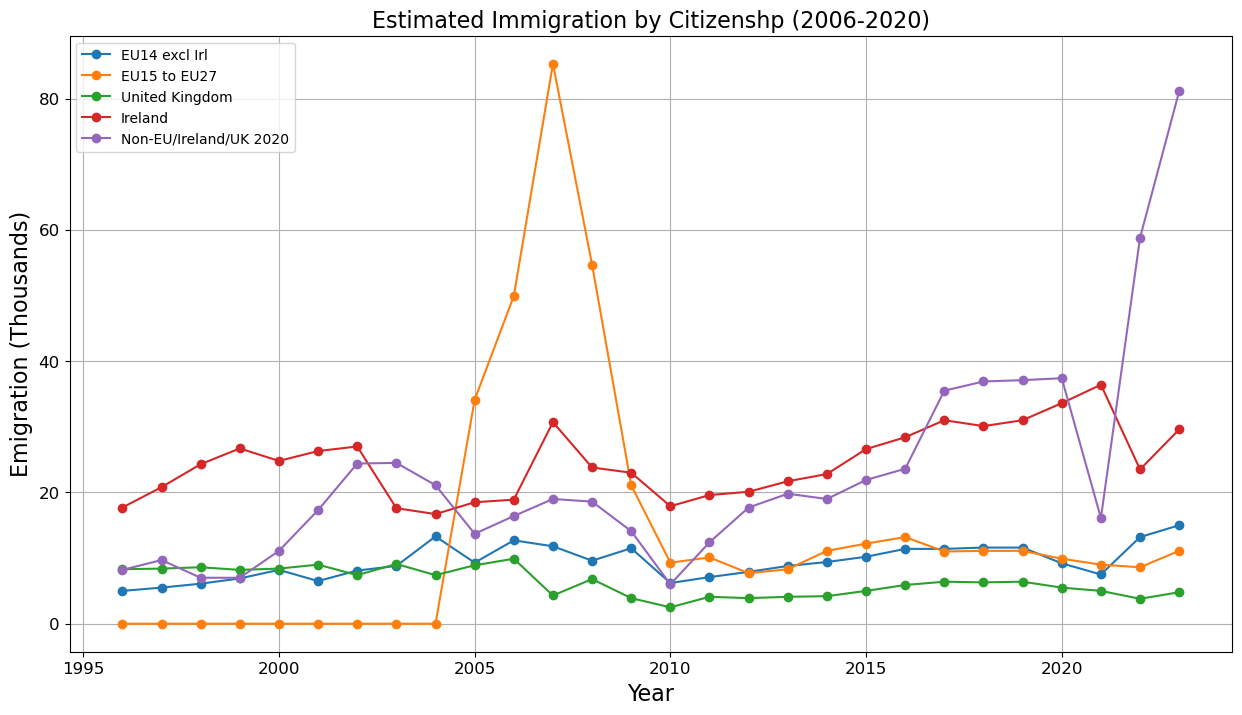

In [22]:
# Filtering the DataFrame for 'Both sexes' to focus on aggregate data
df_filtered = df_pivot[df_pivot['sex'] == 'Both sexes']

# Plotting the data for the specified columns
plt.figure(figsize=(15, 8))
plt.plot(df_filtered['year'], df_filtered['EU14 excl Irl'], marker='o', label='EU14 excl Irl')
plt.plot(df_filtered['year'], df_filtered['EU15 to EU27'], marker='o', label='EU15 to EU27')
plt.plot(df_filtered['year'], df_filtered['United Kingdom'], marker='o', label='United Kingdom')
plt.plot(df_filtered['year'], df_filtered['Ireland'], marker='o', label='Ireland')
plt.plot(df_filtered['year'], df_filtered['Non-EU/Ireland/UK 2020'], marker='o', label='Non-EU/Ireland/UK 2020')

plt.title('Estimated Immigration by Citizenshp (2006-2020)')
plt.xlabel('Year')
plt.ylabel('Emigration (Thousands)')
plt.legend()
plt.grid(True)
plt.savefig('../images/Citizenship_Immigration.png')
plt.show()

### Ongoing research
These mortality, fertility, and migration figures will be merged with population and other data from  [Central Statistics Office in Ireland  population of Ireland series.](https://data.cso.ie/product/pme)

In [23]:
df=df_pivot

In [24]:


# Display basic descriptive statistics
df.describe()



citizenship,index,year,All Countries,Non-EU/Ireland/UK 2020,EU14 excl Irl,EU15 to EU27,Ireland,United Kingdom
count,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000,84.000000
mean,41.500000,2009.500000,51.275000,15.133333,6.283333,9.257143,16.402381,4.204762
std,24.392622,8.126263,27.373322,12.693508,2.933637,14.231420,6.955850,2.099392
min,0.000000,1996.000000,18.800000,2.800000,2.200000,0.000000,7.900000,1.100000
25%,20.750000,2002.750000,30.475000,7.550000,4.050000,0.000000,11.150000,2.500000
50%,41.500000,2009.500000,47.100000,11.150000,5.600000,5.400000,14.650000,3.900000
75%,62.250000,2016.250000,60.900000,18.625000,7.750000,10.425000,19.725000,5.000000
max,83.000000,2023.000000,151.100000,81.100000,15.000000,85.300000,36.400000,9.900000


In [25]:
# Selecting only the numerical columns related to different regions/countries
columns_of_interest = ['Non-EU/Ireland/UK 2020', 'EU14 excl Irl', 'EU15 to EU27', 'Ireland', 'United Kingdom']
df_regions = df[columns_of_interest]

# Calculating the correlation matrix
correlation_matrix = df_regions.corr()

correlation_matrix


citizenship,Non-EU/Ireland/UK 2020,EU14 excl Irl,EU15 to EU27,Ireland,United Kingdom
citizenship,,,,,
Non-EU/Ireland/UK 2020,1.000000,0.725994,0.077471,0.550806,0.136826
EU14 excl Irl,0.725994,1.000000,0.398934,0.714937,0.437682
EU15 to EU27,0.077471,0.398934,1.000000,0.245577,0.098018
Ireland,0.550806,0.714937,0.245577,1.000000,0.528416
United Kingdom,0.136826,0.437682,0.098018,0.528416,1.000000


In [26]:
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/pivot_citizenship_immigration.csv', index=True)